Accuracy: 0.325
F1 Score: 0.37209302325581395
ROC AUC: 0.3375959079283888
Confusion Matrix:
 [[ 5 12]
 [15  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.29      0.27        17
           1       0.40      0.35      0.37        23

    accuracy                           0.33        40
   macro avg       0.33      0.32      0.32        40
weighted avg       0.34      0.33      0.33        40



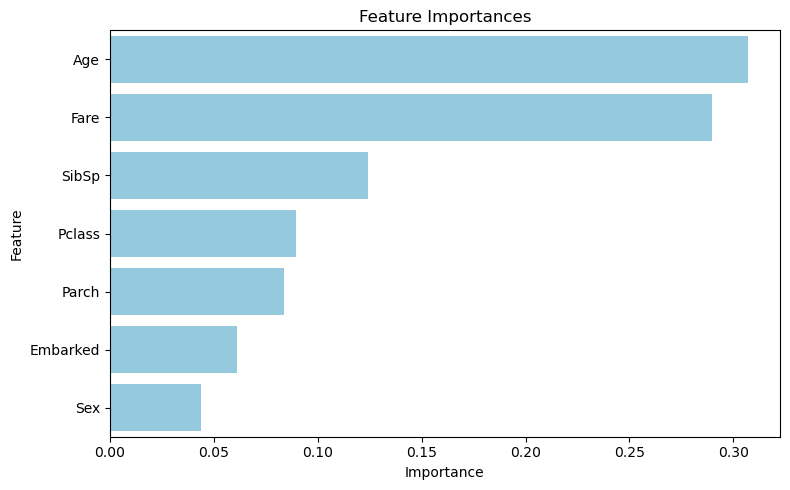

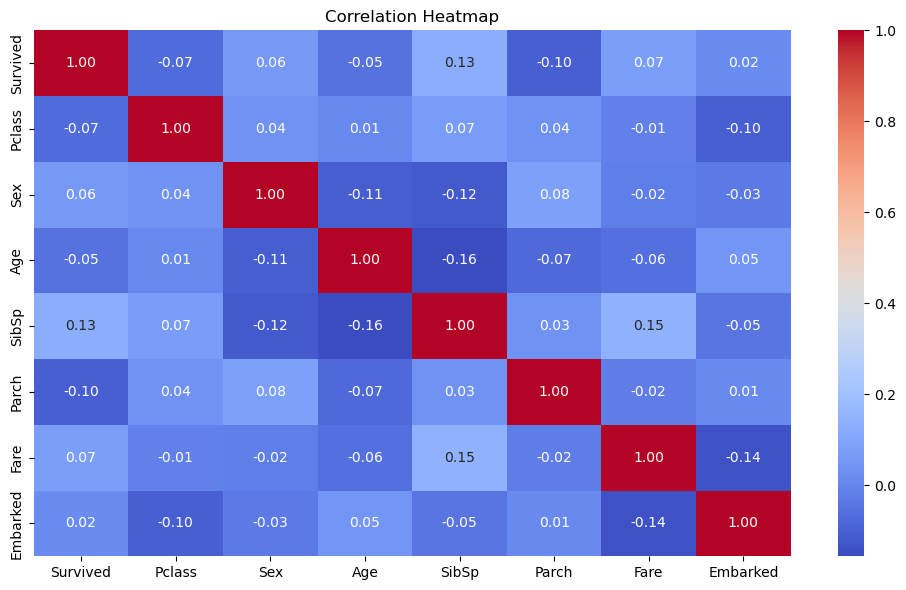

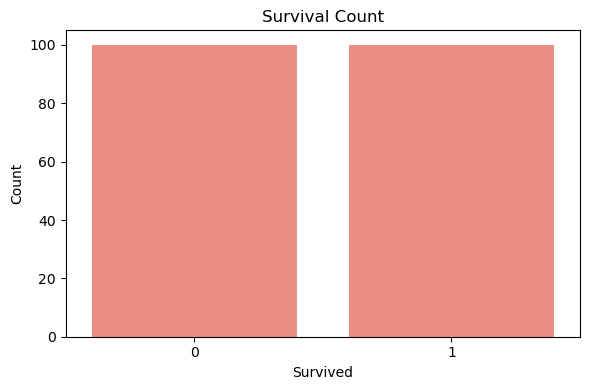

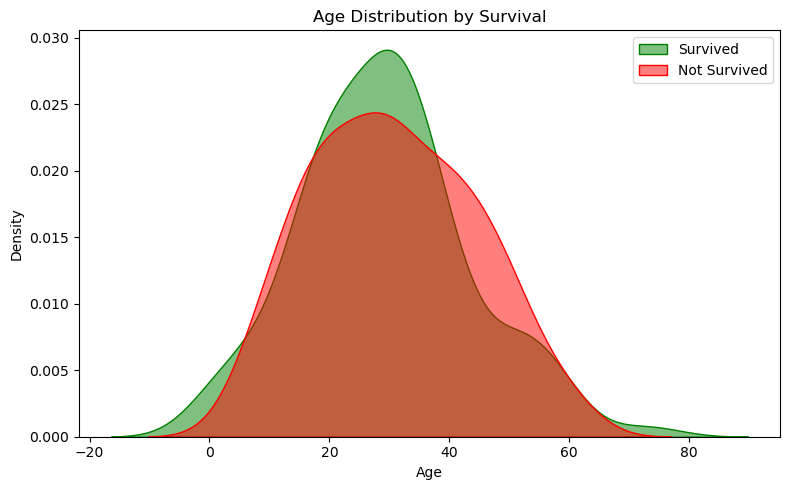

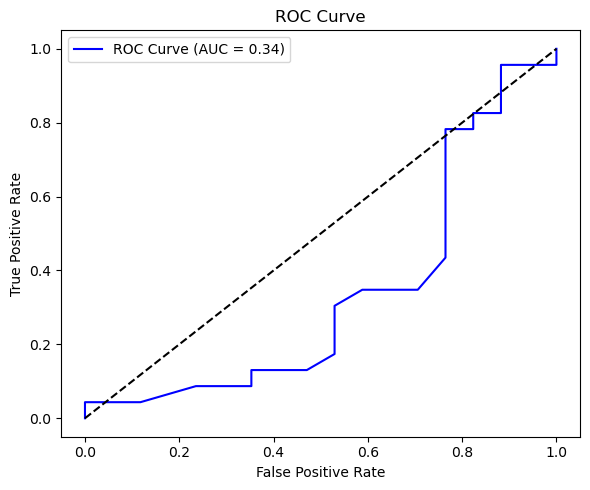

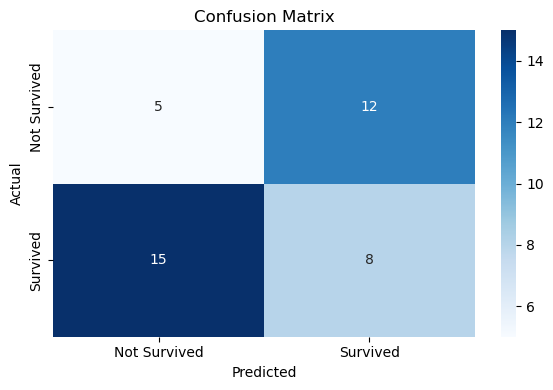

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("generated_titanic_dataset.csv")

# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Clean Age: ensure numeric and fill missing
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # force numeric
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing categorical
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1 Feature importance (Fixed version)
plt.figure(figsize=(8, 5))
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances.values, y=importances.index, color="skyblue")  # fixed warning
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 2 Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 3 Survival count plot (fixed version)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, color="salmon")  # fixed deprecation warning
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 4 Age distribution (fix applied)
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', fill=True, label='Survived', color='green', alpha=0.5)
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', fill=True, label='Not Survived', color='red', alpha=0.5)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# 5 ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# 6 Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", 
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()